# QPong tutorial
In this tutorial, you will learn how to make the core features of QPong.

## Import pakcages

In [1]:
import sys
sys.path.append('/Users/kirais/Documents/GitHub/Qiskit-for-GameDev/pygame/')

In [2]:
from qgame import CircuitGridModel, CircuitGridNode, MeasurementsHistogram
from qgame import circuit_node_types as node_types

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
from qiskit import QuantumCircuit

## Initialize circuit grid

In [11]:
circuit_grid_model = CircuitGridModel(3, 6)
print(circuit_grid_model)

CircuitGridModel: 
e, e, e, e, e, e, 
e, e, e, e, e, e, 
e, e, e, e, e, e, 


In [12]:
qasm_str = circuit_grid_model.create_qasm_for_circuit()
print(qasm_str)

OPENQASM 2.0;include "qelib1.inc";qreg q[3];creg c[3];id q;


In [13]:
circuit = QuantumCircuit.from_qasm_str(qasm_str)
circuit.draw()

## Add gates

In [14]:
x_gate = CircuitGridNode(node_types.X, 1)
h_gate = CircuitGridNode(node_types.H, 1)
cx_gate = CircuitGridNode(node_types.CX, 1, ctrl_a=0)

add r


In [15]:
circuit_grid_model.set_node(1,1,x_gate)
circuit_grid_model.set_node(2,1,h_gate)
circuit_grid_model.set_node(2,2,cx_gate)

In [16]:
qasm_str = circuit_grid_model.create_qasm_for_circuit()
print(qasm_str)

OPENQASM 2.0;include "qelib1.inc";qreg q[3];creg c[3];id q;rx(0) q[1];h q[2];cx q[0],q[2];


In [17]:
circuit = QuantumCircuit.from_qasm_str(qasm_str)
circuit.draw()

## Visualization

In [24]:
from qiskit import BasicAer, execute, ClassicalRegister

In [59]:
def paddle_before_measurement(circuit, qubit_num, shot_num):
        backend_sv_sim = BasicAer.get_backend('statevector_simulator')
        job_sim = execute(circuit, backend_sv_sim, shots=shot_num)
        result_sim = job_sim.result()
        state = result_sim.get_statevector(circuit, decimals=3)
        probability = (state*state).real
        return probability

In [128]:
probability = paddle_before_measurement(circuit, 3, 1000)
print(probability)

[0.499849 0.       0.       0.       0.499849 0.       0.       0.      ]


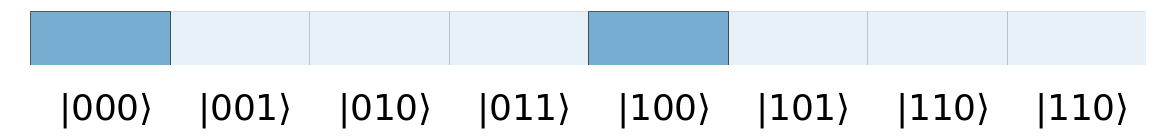

In [127]:
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
plt.figure(figsize=(20,1))
ax = plt.gca()
for i in range(8):
    ax.add_patch(Rectangle((i/8, 0), 1/8, 1, alpha=probability[i]+0.1, ec='k'))

ax.text(0/8+1/40,-1,r"$\left|000\right\rangle$", fontsize=36)
ax.text(1/8+1/40,-1,r"$\left|001\right\rangle$", fontsize=36)
ax.text(2/8+1/40,-1,r"$\left|010\right\rangle$", fontsize=36)
ax.text(3/8+1/40,-1,r"$\left|011\right\rangle$", fontsize=36)
ax.text(4/8+1/40,-1,r"$\left|100\right\rangle$", fontsize=36)
ax.text(5/8+1/40,-1,r"$\left|101\right\rangle$", fontsize=36)
ax.text(6/8+1/40,-1,r"$\left|110\right\rangle$", fontsize=36)
ax.text(7/8+1/40,-1,r"$\left|110\right\rangle$", fontsize=36)
plt.axis('off')
plt.show()